<a href="https://colab.research.google.com/github/jayvardhan-tech/Image_recognition/blob/main/handwritten_word_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_train[100].max()

255

In [5]:
x_train[100].min()

0

In [6]:
x_train = x_train/255.0

In [7]:
x_test = x_test/255.0

In [8]:
x_train[100].max()

1.0

In [9]:
x_train[100].min()

0.0

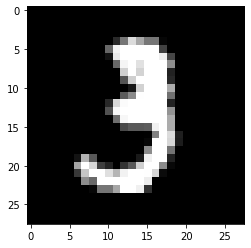

output :[3]


In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap = 'gray')
plt.show()
print(f"output :{[y_train[10]]}")

In [11]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,input_shape = (28,28), activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

In [12]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2019 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0796 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.011

In [14]:
model.get_weights()

[array([[-0.05734787,  0.03430487, -0.01281913, ...,  0.05893949,
         -0.00977626, -0.0178128 ],
        [ 0.03287327,  0.03604764, -0.01309799, ..., -0.03045191,
          0.02311103,  0.01489515],
        [-0.03285048, -0.04775348,  0.03420723, ...,  0.00565854,
          0.03599095,  0.02200971],
        ...,
        [-0.0413599 ,  0.04761586, -0.00032727, ..., -0.02572795,
         -0.01434901,  0.06235573],
        [-0.04703458,  0.01334383,  0.0049255 , ...,  0.06705929,
          0.03275509, -0.04626749],
        [ 0.00149544, -0.05277851,  0.02434344, ...,  0.05546986,
         -0.00348344,  0.02617496]], dtype=float32),
 array([-3.23039293e-02, -9.71434340e-02,  2.58490071e-02,  1.43083915e-01,
         3.76812462e-03, -1.00230575e-01,  2.54839007e-02,  1.62286730e-03,
         4.41510715e-02, -3.37633491e-02, -3.87248136e-02, -1.04500622e-01,
        -4.29543629e-02, -2.37681530e-02, -4.39396203e-02, -4.15140530e-03,
         2.34977948e-03, -6.31823912e-02, -6.51674792e

In [15]:
y_pred = model.predict(x_test)

In [16]:
import numpy as np
y_pred = np.argmax(y_pred,axis =1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.981

[1]


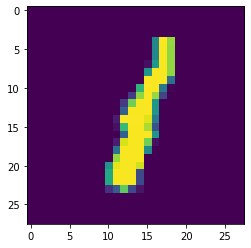

In [18]:
y_pred = model.predict(x_test[89].reshape(1,28,28))
y_pred = np.argmax(y_pred)
y_pred
plt.imshow(x_test[89])
print([y_pred])